# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('task_1/mmlu_data/test.csv')

df_x = pd.read_csv('task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('task_1/lm_scores/lm_Z.csv')

print('df_test size:', df_test.shape)
print('df_x size:', df_x.shape)
print('df_y size:', df_y.shape)
print('df_z size:', df_z.shape)

df_test size: (14042, 8)
df_x size: (13882, 2)
df_y size: (13978, 2)
df_z size: (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [ ]:
# A
print('df_x values:', df_x['result'].value_counts().head(5))
print("-------------------------")
print('df_y values:', df_y['result'].value_counts().head(5))
print("-------------------------")
print('df_z values:', df_z['result'].value_counts().head(5))

df_x values: result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
Name: count, dtype: int64
-------------------------
df_y values: result
D            2894
Answer: D    1718
C            1701
B            1240
D            1145
Name: count, dtype: int64
-------------------------
df_z values: result
D            2257
C            2191
B            2127
A            2060
Answer: D     777
Name: count, dtype: int64


In [4]:
# B - Answer:

# We see that for df_x, df_y and df_z, the value_counts() operation returns a list of 145, 141 and 560 respectively. 
# The expected formats "A,B,C,D" are the most common, but we also see that there are some other formats such as 
# "Answer: A" or "\<An Explanation\>, thus the answer is A". 
# It is also worth noting that there are multiple distinct values for the answer "A" (or "B,C,D") in the dataframes.
# This probably due to the fact that the answers outputted by the model are formatted differently, and the model is not
# able to output a consistent format for the answers.

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [ ]:
# A

df_x_filtered = df_x[df_x['result'].str.len() < 10].copy(deep=True)
df_y_filtered = df_y[df_y['result'].str.len() < 10].copy(deep=True)
df_z_filtered = df_z[df_z['result'].str.len() < 10].copy(deep=True)

df_x_filtered['result'].value_counts()

result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Not Sure       73
Name: count, dtype: int64

In [ ]:
# B
def clean_answer(s, pattern='Answer: '):
    return s.replace(pattern, '').replace(' ', '')

df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)

print('df_x_filtered size:', df_x_filtered.shape)
print(df_x_filtered['result'].value_counts()) # There are still 73 'NotSure' values in df_x_filtered. We can remove them.

print('------------------------')
print('df_y_filtered size:', df_y_filtered.shape)
print(df_y_filtered['result'].value_counts()) 

print('------------------------')
print('df_z_filtered size:', df_z_filtered.shape)
print(df_z_filtered['result'].value_counts())

df_x_filtered size: (13509, 2)
result
A          5788
B          2965
C          2350
D          2333
NotSure      73
Name: count, dtype: int64
------------------------
df_y_filtered size: (13637, 2)
result
D          5757
C          3242
B          2519
A          2033
NotSure      86
Name: count, dtype: int64
------------------------
df_z_filtered size: (12878, 2)
result
D          3348
C          3255
B          3124
A          3026
NotSure     125
Name: count, dtype: int64


In [ ]:
df_x_filtered = df_x_filtered[df_x_filtered['result'] != 'NotSure']
df_y_filtered = df_y_filtered[df_y_filtered['result'] != 'NotSure']
df_z_filtered = df_z_filtered[df_z_filtered['result'] != 'NotSure']

print('df_x_filtered size:', df_x_filtered.shape)
print(df_x_filtered['result'].value_counts()) # There are still 73 'NotSure' values in df_x_filtered. We can remove them.

print('------------------------')
print('df_y_filtered size:', df_y_filtered.shape)
print(df_y_filtered['result'].value_counts()) 

print('------------------------')
print('df_z_filtered size:', df_z_filtered.shape)
print(df_z_filtered['result'].value_counts())

df_x_filtered size: (13436, 2)
result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64
------------------------
df_y_filtered size: (13551, 2)
result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64
------------------------
df_z_filtered size: (12753, 2)
result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64


In [8]:
print("LM X relative difference : " + str(round(np.abs(df_x.shape[0]-df_x_filtered.shape[0])/df_x.shape[0]*100,2)) + ' %')
print("LM Y relative difference : " + str(round(np.abs(df_y.shape[0]-df_y_filtered.shape[0])/df_y.shape[0]*100,2)) + ' %')
print("LM Z relative difference : " + str(round(np.abs(df_z.shape[0]-df_z_filtered.shape[0])/df_z.shape[0]*100,2)) + ' %')

LM X relative difference : 3.21 %
LM Y relative difference : 3.05 %
LM Z relative difference : 8.4 %


C. /Discuss:/

The relative differences for LM X and Y are little, they are about 3%. For LM Z, it is more important with a relative difference of 8.4%. It could create a bias in the study.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [ ]:
# A

df_x_joined = df_test.join(df_x_filtered, on='question_id', how='inner', rsuffix='_x')
df_y_joined = df_test.join(df_y_filtered, on='question_id', how='inner', rsuffix='_y')
df_z_joined = df_test.join(df_z_filtered, on='question_id', how='inner', rsuffix='_z')

df_x_joined

,question,A,B,C,D,answer,subject,question_id,question_id_x,result
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,0,B
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,1,C
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,2,D
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3,3,B
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4,4,B
...,...,...,...,...,...,...,...,...,...,...
13877,"Guru Nanak used what term to denote the ""divi...",Shabad,Khalse,Nam,Guru,A,world religions,13877,14037,A
13878,What is the mi'raj?,Muhammad's miraculous ascent to heaven,Muhammad's migration to Mecca,Muhammad's first community in Mecca,Muhammad's revelations of the Qur'an,A,world religions,13878,14038,A
13879,What is the name of the most famous dharmashas...,Laws of Dharma,Laws of Karma,Laws of Vishnu,Laws of Manu,D,world religions,13879,14039,B
13880,"What does the term ""Qur'an"" literally mean?",The Holy Book,The Narrative,The Recitation,The Pillars,C,world religions,13880,14040,B


In [ ]:
# B

df_x_joined['correct'] = df_x_joined['result'] == df_x_joined['answer']
df_y_joined['correct'] = df_y_joined['result'] == df_y_joined['answer']
df_z_joined['correct'] = df_z_joined['result'] == df_z_joined['answer']

df_x_joined.head(10)

,question,A,B,C,D,answer,subject,question_id,question_id_x,result,correct
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,0,B,True
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,1,C,True
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,2,D,True
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3,3,B,True
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4,4,B,True
5,Statement 1 | If a group has an element of ord...,"True, True","False, False","True, False","False, True",A,abstract algebra,5,5,A,True
6,Statement 1 | Every homomorphic image of a gro...,"True, True","False, False","True, False","False, True",A,abstract algebra,6,6,A,True
7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,7,7,D,True
8,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,8,8,A,False
9,Find all zeros in the indicated finite field o...,1,2,"2,3",6,C,abstract algebra,9,9,C,True


In [11]:
print('df_x_joined score:', df_x_joined['correct'].mean())
print('df_y_joined score:', df_y_joined['correct'].mean())
print('df_z_joined score:', df_z_joined['correct'].mean())

df_x_joined score: 0.3397588568026198
df_y_joined score: 0.3437384694856468
df_z_joined score: 0.31812122637810714


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

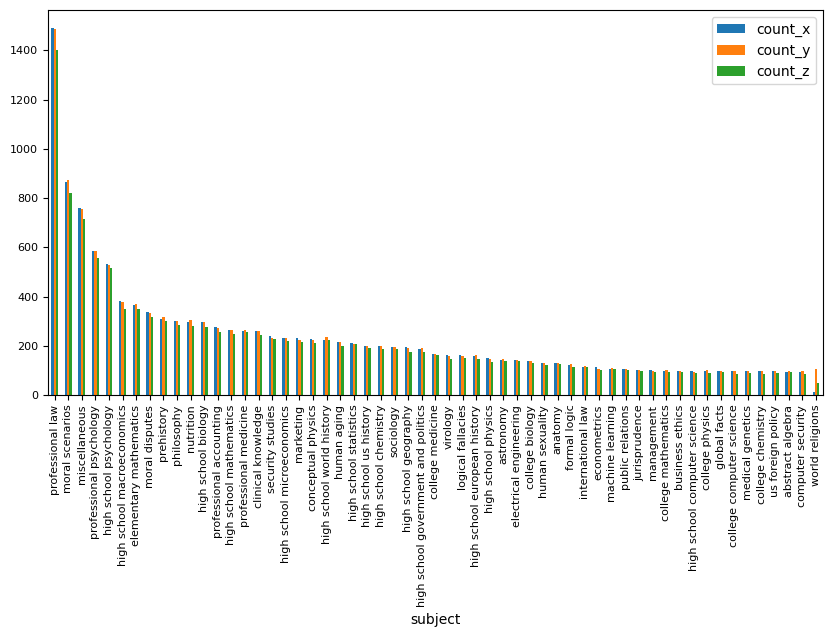

,count_x,count_y,count_z,diff_X/Y,diff_X/Z,diff_Y/Z
subject,,,,,,
virology,162,158,145,0.024691,0.104938,0.082278
college computer science,97,98,84,-0.010309,0.134021,0.142857
medical genetics,97,99,89,-0.020619,0.082474,0.101010
college chemistry,96,98,84,-0.020833,0.125000,0.142857
computer security,95,98,87,-0.031579,0.084211,0.112245
world religions,11,106,50,-8.636364,-3.545455,0.528302


In [12]:
# A

df_subjects = pd.DataFrame()
df_subjects['count_x'] = df_x_joined['subject'].value_counts()
df_subjects['count_y'] = df_y_joined['subject'].value_counts()
df_subjects['count_z'] = df_z_joined['subject'].value_counts()

df_subjects.plot(kind='bar', figsize=(10, 5), fontsize=8)
plt.show()

df_subjects['diff_X/Y'] = (df_subjects['count_x'] - df_subjects['count_y'])/df_subjects['count_x']
df_subjects['diff_X/Z'] = (df_subjects['count_x'] - df_subjects['count_z'])/df_subjects['count_x']
df_subjects['diff_Y/Z'] = (df_subjects['count_y'] - df_subjects['count_z'])/df_subjects['count_y']

df_subjects_imb = df_subjects[(np.abs(df_subjects['diff_X/Y']) > 0.1) | (np.abs(df_subjects['diff_X/Z']) > 0.1) 
                              | (np.abs(df_subjects['diff_Y/Z']) > 0.1)]

df_subjects_imb

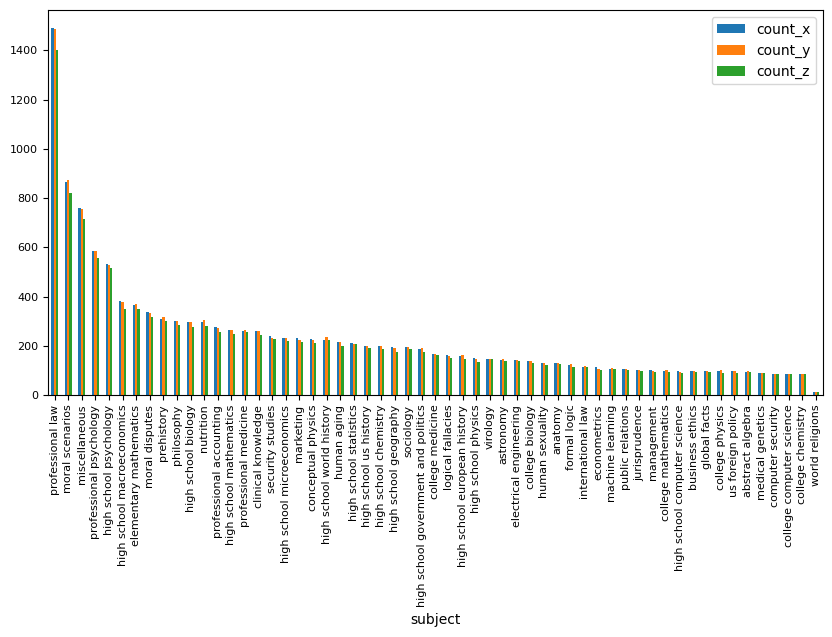

df_x_joined score: 0.33891463596950216
df_y_joined score: 0.34395998208152906
df_z_joined score: 0.3183105238319962


,count_x,count_y,count_z
subject,,,


In [13]:
# B

# For each subject where there is an imbalance of more than 10%, remove randomly samples from the subject in the df with the highest count
# to reach a balance with the other df.

imb_subjects = df_subjects_imb.index

for subject in imb_subjects:
    count_x = df_subjects.loc[subject, 'count_x']
    count_y = df_subjects.loc[subject, 'count_y']
    count_z = df_subjects.loc[subject, 'count_z']
    
    min_count = min(count_x, count_y, count_z)

    df_x_joined = df_x_joined.drop(df_x_joined[df_x_joined['subject'] == subject].sample(n=count_x - min_count).index)
    df_y_joined = df_y_joined.drop(df_y_joined[df_y_joined['subject'] == subject].sample(n=count_y - min_count).index)
    df_z_joined = df_z_joined.drop(df_z_joined[df_z_joined['subject'] == subject].sample(n=count_z - min_count).index)

df_subjects = pd.DataFrame()
df_subjects['count_x'] = df_x_joined['subject'].value_counts()
df_subjects['count_y'] = df_y_joined['subject'].value_counts()
df_subjects['count_z'] = df_z_joined['subject'].value_counts()

df_subjects.plot(kind='bar', figsize=(10, 5), fontsize=8)
plt.show()
print('df_x_joined score:', df_x_joined['correct'].mean())
print('df_y_joined score:', df_y_joined['correct'].mean())
print('df_z_joined score:', df_z_joined['correct'].mean())
df_subjects_imb = df_subjects[(np.abs(df_subjects['count_x'] - df_subjects['count_y'])/df_subjects['count_x'] > 0.1)
                                | (np.abs(df_subjects['count_x'] - df_subjects['count_z'])/df_subjects['count_x'] > 0.1)
                                | (np.abs(df_subjects['count_y'] - df_subjects['count_z'])/df_subjects['count_y'] > 0.1)]

df_subjects_imb # There are no more imbalances

In [14]:
# C

print('df_x_joined score:', df_x_joined['correct'].mean())
print('df_y_joined score:', df_y_joined['correct'].mean())
print('df_z_joined score:', df_z_joined['correct'].mean())

df_x_joined score: 0.33891463596950216
df_y_joined score: 0.34395998208152906
df_z_joined score: 0.3183105238319962


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [15]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

In [16]:
df_mmlu.head()

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


In [17]:
df_other.head()

,result,question_id,question,A,B,C,D,answer,correct,model_name
0,B,0,Which factor will most likely cause a person t...,a leg muscle relaxing after exercise,a bacterial population in the bloodstream,several viral particles on the skin,carbohydrates being digested in the stomach,B,True,X
1,B,1,Lichens are symbiotic organisms made of green ...,carbon dioxide,food,protection,water,B,True,X
2,D,2,When a switch is used in an electrical circuit...,cause the charge to build.,increase and decrease the voltage.,cause the current to change direction.,stop and start the flow of current.,D,True,X
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X
4,C,4,"Rocks are classified as igneous, metamorphic, ...",their color,their shape,how they formed,the minerals they contain,C,True,X


### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [18]:
# A
df_mmlu_mean = df_mmlu.groupby(["model_name"])["correct"].mean()
df_mmlu_std = df_mmlu.groupby(["model_name"])['correct'].std()

df_other_mean = df_other.groupby(["model_name"])["correct"].mean()
df_other_std = df_other.groupby(["model_name"])['correct'].std()

print("MMLU")
print(f'mean value X : {df_mmlu_mean["X"]}')
print(f'standard deviation  X : {df_mmlu_std["X"]}')

print(f'mean value Y : {df_mmlu_mean["Y"]}')
print(f'standard deviation  Y : {df_mmlu_std["Y"]}')

print(f'mean value Z : {df_mmlu_mean["Z"]}')
print(f'standard deviation  Z : {df_mmlu_std["Z"]}')

print("------------------------")

print("Other dataset")
print(f'mean value X : {df_other_mean["X"]}')
print(f'standard deviation  X : {df_other_std["X"]}')

print(f'mean value Y : {df_other_mean["Y"]}')
print(f'standard deviation  Y : {df_other_std["Y"]}')

print(f'mean value Z : {df_other_mean["Z"]}')
print(f'standard deviation  Z : {df_other_std["Z"]}')


MMLU
mean value X : 0.7435875512995896
standard deviation  X : 0.4366708233690764
mean value Y : 0.7615424076607387
standard deviation  Y : 0.4261585346083827
mean value Z : 0.6559507523939808
standard deviation  Z : 0.47507753041876866
------------------------
Other dataset
mean value X : 0.787975525405693
standard deviation  X : 0.4087964700815396
mean value Y : 0.7209364192604416
standard deviation  Y : 0.44859852243168147
mean value Z : 0.6717212024474595
standard deviation  Z : 0.4696493443034079


In [19]:
df_mmlu_statistics = pd.DataFrame(index=[["mmlu",'mmlu','mmlu'],["X","Y","Z"]])
df_mmlu_statistics.index.names = ["dataset","model_name"]
df_mmlu_statistics["mean"] = np.array(df_mmlu_mean)
df_mmlu_statistics["std"] = np.array(df_mmlu_std)
df_mmlu_statistics["sample_size"] = np.array(df_mmlu.groupby("model_name").size())

df_mmlu_statistics.head()

mean       std  sample_size
dataset model_name                                 
mmlu    X           0.743588  0.436671        11696
        Y           0.761542  0.426159        11696
        Z           0.655951  0.475078        11696

In [20]:
df_other_statistics = pd.DataFrame(index=[["other",'other','other'],["X","Y","Z"]])
df_other_statistics.index.names = ["dataset","model_name"]
df_other_statistics["mean"] = np.array(df_other_mean)
df_other_statistics["std"] = np.array(df_other_std)
df_other_statistics["sample_size"] = np.array(df_other.groupby("model_name").size())

df_other_statistics.head()

mean       std  sample_size
dataset model_name                                 
other   X           0.787976  0.408796         3759
        Y           0.720936  0.448599         3759
        Z           0.671721  0.469649         3759

In [21]:
# B
df_dataset_statistics = pd.concat([df_mmlu_statistics,df_other_statistics])

df_dataset_statistics.head(6)

mean       std  sample_size
dataset model_name                                 
mmlu    X           0.743588  0.436671        11696
        Y           0.761542  0.426159        11696
        Z           0.655951  0.475078        11696
other   X           0.787976  0.408796         3759
        Y           0.720936  0.448599         3759
        Z           0.671721  0.469649         3759

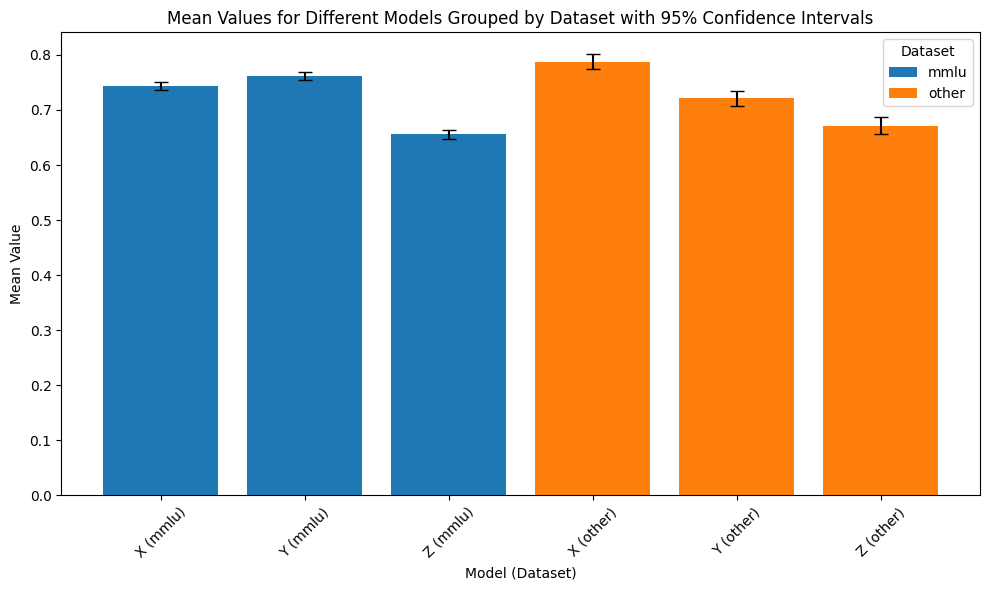

In [22]:
# Calculate the 95% confidence interval
df_dataset_statistics['ci95'] = 1.96 * df_dataset_statistics['std'] / np.sqrt(df_dataset_statistics['sample_size'])  # Assuming n=3 for simplicity

# Reset index for plotting
df_reset = df_dataset_statistics.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for dataset in df_reset['dataset'].unique():
    subset = df_reset[df_reset['dataset'] == dataset]
    plt.bar(subset['model_name'] + ' (' + dataset + ')', subset['mean'], yerr=subset['ci95'], capsize=5, label=dataset)

plt.xlabel('Model (Dataset)')
plt.ylabel('Mean Value')
plt.title('Mean Values for Different Models Grouped by Dataset with 95% Confidence Intervals')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

C. /Discuss:/

The model X seems to be slightly better. It is the one that performs the best on the other dataset and it is slightly below Y for MMLU dataset. X and Z have better performance for the other dataset than for MMLU. However, it is the inverse for Y.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [23]:
df_mmlu.head()

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


<Axes: title={'center': 'Distribution of correct answers MMLU'}, xlabel='Answers', ylabel='Distribution'>

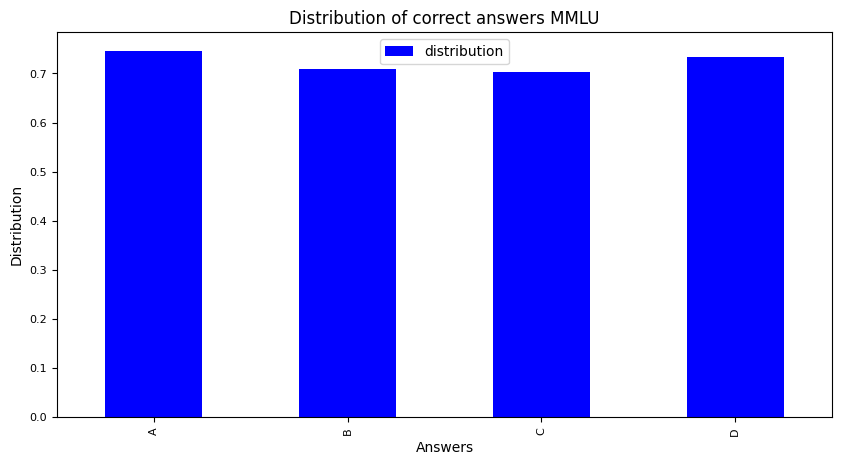

In [24]:
# A
## MMLU

df_mmlu_answers = df_mmlu.groupby('answer')['correct'].value_counts()
df_numb_questions_mmlu = np.array(df_mmlu_answers[0::2]) + np.array(df_mmlu_answers[1::2])
df_mmlu_answers = pd.DataFrame(df_mmlu_answers)
df_mmlu_answers = df_mmlu_answers.reset_index()
df_mmlu_answers_distribution = pd.DataFrame(index = ['A','B','C','D'])
df_mmlu_answers_distribution["distribution"] = np.array(df_mmlu_answers[df_mmlu_answers['correct']==True]['count']/
                                                        df_numb_questions_mmlu)

df_mmlu_answers_distribution.plot.bar(xlabel='Answers', ylabel="Distribution", title="Distribution of correct answers MMLU",
                                      figsize=(10, 5), fontsize=8, color=["blue",'red','orange','green'])

<Axes: title={'center': 'Distribution of correct answers Other dataset'}, xlabel='Answers', ylabel='Distribution'>

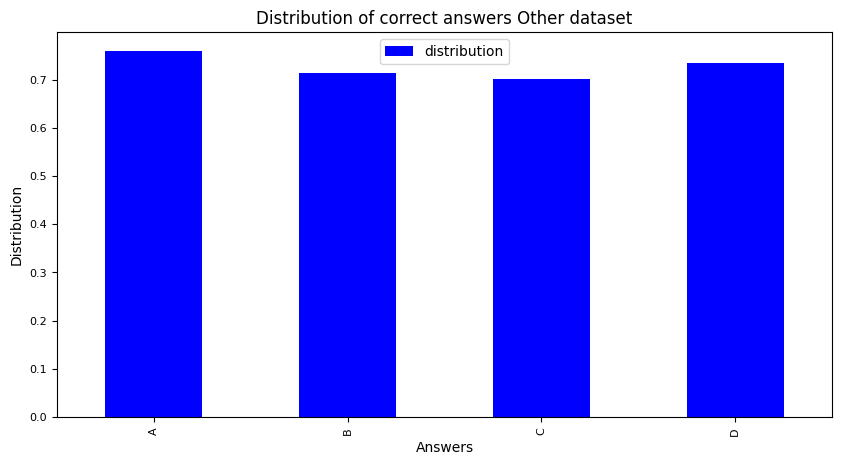

In [25]:
df_other_answers = df_other.groupby('answer')['correct'].value_counts()
df_numb_questions_other = np.array(df_other_answers[0::2]) + np.array(df_other_answers[1::2])
df_other_answers = pd.DataFrame(df_other_answers)
df_other_answers = df_other_answers.reset_index()
df_other_answers_distribution = pd.DataFrame(index = ['A','B','C','D'])
df_other_answers_distribution["distribution"] = np.array(df_other_answers[df_other_answers['correct']==True]['count']/
                                                         df_numb_questions_other)

df_other_answers_distribution.plot.bar(xlabel='Answers', ylabel="Distribution", title="Distribution of correct answers Other dataset",
                                      figsize=(10, 5), fontsize=8, color=["blue",'red','orange','green'])

In [26]:
# B
# Null hypothesis : the two datasets have questions of similar difficulties
# Alternative hypothesis : the two datasets have questions of different difficulties

df_contingency_table = pd.DataFrame(index=["A","B","C","D"])
df_contingency_table.index.name = "Answer"

df_contingency_table["MMLU"] = df_mmlu_answers_distribution["distribution"]
df_contingency_table["Other"] = df_other_answers_distribution["distribution"]

df_contingency_table

,MMLU,Other
Answer,,
A,0.746534,0.760049
B,0.709480,0.712664
C,0.703497,0.700577
D,0.732995,0.733749


In [27]:
from scipy.stats import chi2_contingency

res = chi2_contingency(df_contingency_table)

print(f'Test statistic : {res.statistic}')
print(f'P-value : {res.pvalue}')

Test statistic : 9.840652285108843e-05
P-value : 0.9999997403778063


The p-value is very high. It is quite likely that the questions of two datasets have the same difficulty. It feels like the LM Y is not as good on the dataset other than MMLU. It could come from its training.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [28]:
# A
## MMLU

df_x_mmlu_answers = df_mmlu[df_mmlu['model_name']=='X'].groupby('answer')['correct'].value_counts()
df_numb_questions_x_mmlu = np.array(df_x_mmlu_answers[0::2]) + np.array(df_x_mmlu_answers[1::2])
df_x_mmlu_answers = pd.DataFrame(df_x_mmlu_answers)

df_x_mmlu_answers

count
answer correct       
A      True      1567
       False       44
B      True      2352
       False      591
C      True      2409
       False      994
D      True      2369
       False     1370

In [29]:
df_x_mmlu_answers = df_x_mmlu_answers.reset_index()
df_x_mmlu_answers_accuracy = pd.DataFrame(index = ['A','B','C','D'])
df_x_mmlu_answers_accuracy["accuracy"] = np.array(df_x_mmlu_answers[df_x_mmlu_answers['correct']==True]['count']/
                                                        df_numb_questions_x_mmlu)

df_x_mmlu_answers_accuracy

,accuracy
A,0.972688
B,0.799185
C,0.707905
D,0.633592


In [30]:
## Other
df_x_other_answers = df_other[df_other['model_name']=='X'].groupby('answer')['correct'].value_counts()
df_numb_questions_x_other = np.array(df_x_other_answers[0::2]) + np.array(df_x_other_answers[1::2])
df_x_other_answers = pd.DataFrame(df_x_other_answers)

df_x_other_answers

count
answer correct       
A      True      1050
       False       28
B      True       900
       False      216
C      True       625
       False      299
D      True       387
       False      254

In [31]:
df_x_other_answers = df_x_other_answers.reset_index()
df_x_other_answers_accuracy = pd.DataFrame(index = ['A','B','C','D'])
df_x_other_answers_accuracy["accuracy"] = np.array(df_x_other_answers[df_x_other_answers['correct']==True]['count']/
                                                        df_numb_questions_x_other)

df_x_other_answers_accuracy

,accuracy
A,0.974026
B,0.806452
C,0.676407
D,0.603744


In [32]:
print(f"LM X's mean accuracy for MMLU : {df_x_mmlu_answers_accuracy.mean()[0]}")
print(f"LM X's mean accuracy for other : {df_x_other_answers_accuracy.mean()[0]}")

LM X's mean accuracy for MMLU : 0.7783422341380172
LM X's mean accuracy for other : 0.7651571657755292


In [33]:
# B

numb_batches=100

## MMLU
df_x_mmlu = df_mmlu[df_mmlu["model_name"] == 'X']
df_x_A_answer_mmlu = df_x_mmlu[df_x_mmlu["answer"]== 'A']["correct"]
df_x_A_answer_batch_mmlu = np.array_split(np.array(df_x_A_answer_mmlu),numb_batches)
df_x_A_accuracy_batch_mmlu = np.array([df_x_A_answer_batch_mmlu[i].mean() for i in range(numb_batches)])
## Other
df_x_other = df_other[df_other["model_name"] == 'X']
df_x_A_answer_other = df_x_other[df_x_other["answer"]== 'A']["correct"]
df_x_A_answer_batch_other = np.array_split(np.array(df_x_A_answer_other),numb_batches)
df_x_A_accuracy_batch_other = np.array([df_x_A_answer_batch_other[i].mean() for i in range(numb_batches)])

In [34]:
res_x_A = ttest_ind(df_x_A_accuracy_batch_mmlu, df_x_A_accuracy_batch_other)

print(res_x_A.statistic)
print(res_x_A.pvalue)

-0.2567302393284809
0.7976535957165116


In [35]:
from scipy import stats

def compute_confidence_interval(data1, data2, confidence=0.95):
    # Calculate the means of the samples
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate the standard deviations of the samples
    std1 = np.std(data1, ddof=1)
    std2 = np.std(data2, ddof=1)
    
    # Calculate the sample sizes
    n1 = len(data1)
    n2 = len(data2)
    
    # Calculate the standard error of the difference in means
    se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Calculate the mean difference
    mean_diff = mean1 - mean2
    
    # Degrees of freedom for the t-distribution
    dof = n1 + n2 - 2
    
    # Critical value from the t-distribution
    t_critical = stats.t.ppf((1 + confidence) / 2, dof)
    
    # Margin of error
    margin_of_error = t_critical * se
    
    # Confidence interval
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    
    return (ci_lower, ci_upper)

In [36]:
CI_interval_A_x = compute_confidence_interval(df_x_A_accuracy_batch_mmlu, df_x_A_accuracy_batch_other)
print(CI_interval_A_x)

(-0.013323679458746079, 0.0102541607421684)


It seems like X performs the same on both dataset for answer A. One could argue that both datasets have the same difficulty.

In [37]:
# C

## C
### MMLU
df_x_mmlu = df_mmlu[df_mmlu["model_name"] == 'X']
df_x_C_answer_mmlu = df_x_mmlu[df_x_mmlu["answer"]== 'C']["correct"]
df_x_C_answer_batch_mmlu = np.array_split(np.array(df_x_C_answer_mmlu),numb_batches)
df_x_C_accuracy_batch_mmlu = np.array([df_x_C_answer_batch_mmlu[i].mean() for i in range(numb_batches)])
### Other
df_x_other = df_other[df_other["model_name"] == 'X']
df_x_C_answer_other = df_x_other[df_x_other["answer"]== 'C']["correct"]
df_x_C_answer_batch_other = np.array_split(np.array(df_x_C_answer_other),numb_batches)
df_x_C_accuracy_batch_other = np.array([df_x_C_answer_batch_other[i].mean() for i in range(numb_batches)])
CI_interval_C_x = compute_confidence_interval(df_x_C_accuracy_batch_mmlu, df_x_C_accuracy_batch_other)

res_x_C = ttest_ind(df_x_C_accuracy_batch_mmlu, df_x_C_accuracy_batch_other)

print(f"T-statistic of answer C : {res_x_C.statistic}")
print(f'P-value of answer C : {res_x_C.pvalue}')
print(f'CI at 95% C : {CI_interval_C_x}')

print('------------------')

## D
### MMLU
df_x_mmlu = df_mmlu[df_mmlu["model_name"] == 'X']
df_x_d_answer_mmlu = df_x_mmlu[df_x_mmlu["answer"]== 'D']["correct"]
df_x_d_answer_batch_mmlu = np.array_split(np.array(df_x_d_answer_mmlu),numb_batches)
df_x_d_accuracy_batch_mmlu = np.array([df_x_d_answer_batch_mmlu[i].mean() for i in range(numb_batches)])
### Other
df_x_other = df_other[df_other["model_name"] == 'X']
df_x_d_answer_other = df_x_other[df_x_other["answer"]== 'D']["correct"]
df_x_d_answer_batch_other = np.array_split(np.array(df_x_d_answer_other),numb_batches)
df_x_d_accuracy_batch_other = np.array([df_x_d_answer_batch_other[i].mean() for i in range(numb_batches)])
CI_interval_D_x = compute_confidence_interval(df_x_d_accuracy_batch_mmlu, df_x_d_accuracy_batch_other)

res_x_d = ttest_ind(df_x_d_accuracy_batch_mmlu, df_x_d_accuracy_batch_other)

print(f"T-statistic of answer D : {res_x_d.statistic}")
print(f'P-value of answer D : {res_x_d.pvalue}')
print(f'CI at 95% D : {CI_interval_D_x}')


T-statistic of answer C : 1.712959045477828
P-value of answer C : 0.08828540300230407
CI at 95% C : (-0.004737691215023404, 0.06739128598626573)
------------------
T-statistic of answer D : 1.3887443142643718
P-value of answer D : 0.1664706753668014
CI at 95% D : (-0.012947380664881214, 0.07460151600322695)


LM X's performance for answers C and D is much more volatile than for answer A. It seems like the LM is better to answer A type question. It could also come from the fact that there are more C and D questions in MMLU.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [38]:
# A

df_mmlu_mean_accuracies = df_mmlu.groupby("model_name")["correct"].mean()

df_other_mean_accuracies = df_other.groupby("model_name")["correct"].mean()

print("MMLU")
print(df_mmlu_mean_accuracies)
print("---------------")
print("Other")
print(df_other_mean_accuracies)


MMLU
model_name
X    0.743588
Y    0.761542
Z    0.655951
Name: correct, dtype: float64
---------------
Other
model_name
X    0.787976
Y    0.720936
Z    0.671721
Name: correct, dtype: float64


B. /Discuss:/

X and Z perform better on other while Y performs better on MMLU

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

The answer of the LM should be invariant with respect to the shuffle. Ms.Sakota is trying to see if the LM tends to eliminate a bias. If the LM answers A most of the time for no particular reason, it could explain why A answers have a much better accuracy. Reshuffling should eliminate this bias.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [39]:
# M = 1 because only one shufled dataset
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')

df_y_mmlu = df_mmlu[df_mmlu["model_name"] == 'Y']
df_z_mmlu = df_mmlu[df_mmlu["model_name"] == 'Z']

df_x_mmlu_shuffle = df_mmlu_shuffle[df_mmlu_shuffle["model_name"] == 'X']
df_y_mmlu_shuffle = df_mmlu_shuffle[df_mmlu_shuffle["model_name"] == 'Y']
df_z_mmlu_shuffle = df_mmlu_shuffle[df_mmlu_shuffle["model_name"] == 'Z']

In [40]:
print(df_x_mmlu["correct"].value_counts())
print("-----------------")
print(df_x_mmlu_shuffle["correct"].value_counts())

correct
True     8697
False    2999
Name: count, dtype: int64
-----------------
correct
True     9159
False    2537
Name: count, dtype: int64


In [41]:
df_x_mmlu_retest=df_x_mmlu_shuffle["correct"]*df_x_mmlu["correct"]
df_y_mmlu_retest=df_y_mmlu_shuffle["correct"]*df_y_mmlu["correct"]
df_z_mmlu_retest=df_z_mmlu_shuffle["correct"]*df_z_mmlu["correct"]


df_x_mmlu_retest.value_counts()

correct
True     6882
False    4814
Name: count, dtype: int64

In [42]:
test_retest_x = df_x_mmlu_retest.mean()
test_retest_y = df_y_mmlu_retest.mean()
test_retest_z = df_z_mmlu_retest.mean()

print(f'Test-retest metrix X : {test_retest_x}')
print(f'Test-retest metrix Y : {test_retest_y}')
print(f'Test-retest metrix Z : {test_retest_z}')

Test-retest metrix X : 0.588406292749658
Test-retest metrix Y : 0.5716484268125855
Test-retest metrix Z : 0.44160396716826267


<Axes: title={'center': 'Accuracy and test-retest metric comparsion for MMLU'}, xlabel='model_name', ylabel='Distribution'>

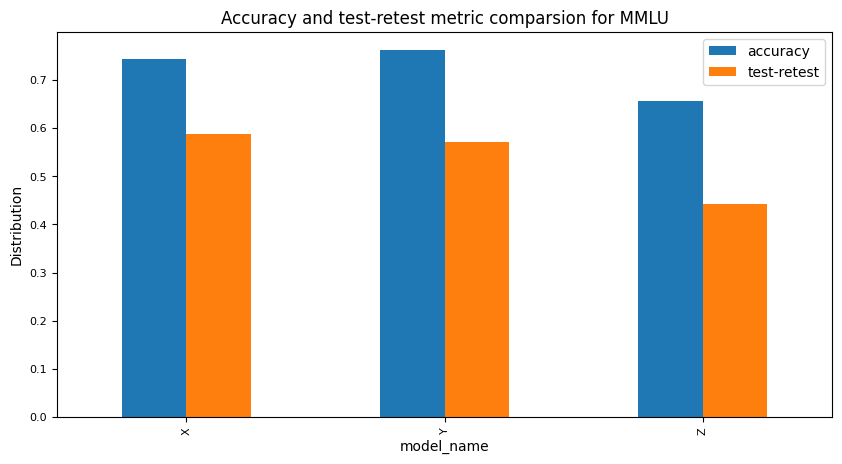

In [43]:
df_mmlu_metrics = pd.DataFrame(index=["X","Y","Z"])
df_mmlu_metrics.index.name = "model_name"

df_mmlu_metrics["accuracy"] = np.array(df_mmlu_mean_accuracies)
df_mmlu_metrics["test-retest"] = np.array([test_retest_x,test_retest_y,test_retest_z])

df_mmlu_metrics.plot.bar(ylabel="Distribution", title="Accuracy and test-retest metric comparsion for MMLU",
                                      figsize=(10, 5), fontsize=8,)

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [44]:
# A

## X
numb_questions_tot_x = df_x_mmlu["result"].size

dist_questions_A_x = df_x_mmlu[df_x_mmlu["result"] == 'A']["result"].size/numb_questions_tot_x
dist_questions_B_x = df_x_mmlu[df_x_mmlu["result"] == 'B']["result"].size/numb_questions_tot_x
dist_questions_C_x = df_x_mmlu[df_x_mmlu["result"] == 'C']["result"].size/numb_questions_tot_x
dist_questions_D_x = df_x_mmlu[df_x_mmlu["result"] == 'D']["result"].size/numb_questions_tot_x

## Y
numb_questions_tot_y = df_y_mmlu["result"].size

dist_questions_A_y = df_y_mmlu[df_y_mmlu["result"] == 'A']["result"].size/numb_questions_tot_y
dist_questions_B_y = df_y_mmlu[df_y_mmlu["result"] == 'B']["result"].size/numb_questions_tot_y
dist_questions_C_y = df_y_mmlu[df_y_mmlu["result"] == 'C']["result"].size/numb_questions_tot_y
dist_questions_D_y = df_y_mmlu[df_y_mmlu["result"] == 'D']["result"].size/numb_questions_tot_y

## Z
numb_questions_tot_z = df_z_mmlu["result"].size

dist_questions_A_z = df_z_mmlu[df_z_mmlu["result"] == 'A']["result"].size/numb_questions_tot_z
dist_questions_B_z = df_z_mmlu[df_z_mmlu["result"] == 'B']["result"].size/numb_questions_tot_z
dist_questions_C_z = df_z_mmlu[df_z_mmlu["result"] == 'C']["result"].size/numb_questions_tot_z
dist_questions_D_z = df_z_mmlu[df_z_mmlu["result"] == 'D']["result"].size/numb_questions_tot_z

<Axes: title={'center': 'Dsitribution of the answers for each LM for MMLU'}, xlabel='LM', ylabel='Distribution'>

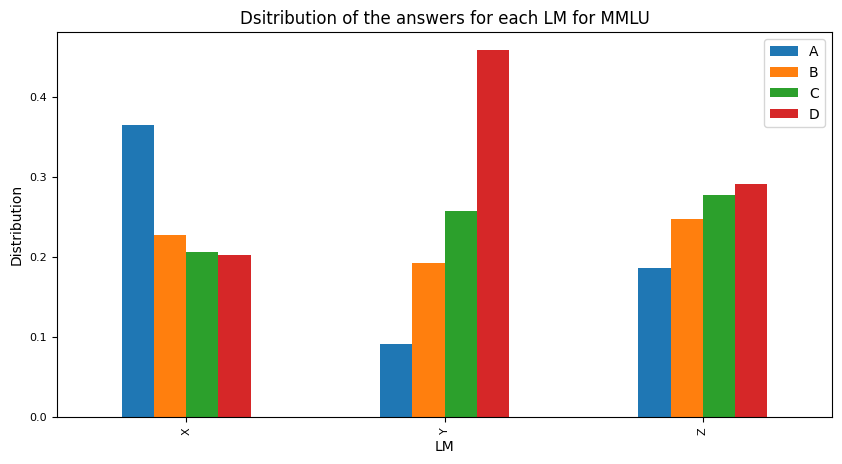

In [45]:
df_dist_questions_mmlu = pd.DataFrame(index = ['X','Y','Z'])

df_dist_questions_mmlu["A"] = np.array([dist_questions_A_x, dist_questions_A_y, dist_questions_A_z])
df_dist_questions_mmlu["B"] = np.array([dist_questions_B_x, dist_questions_B_y, dist_questions_B_z])
df_dist_questions_mmlu["C"] = np.array([dist_questions_C_x, dist_questions_C_y, dist_questions_C_z])
df_dist_questions_mmlu["D"] = np.array([dist_questions_D_x, dist_questions_D_y, dist_questions_D_z])

df_dist_questions_mmlu.plot.bar(xlabel="LM", ylabel="Distribution", title="Dsitribution of the answers for each LM for MMLU",
                                      figsize=(10, 5), fontsize=8,)

In [46]:
## X
df_x_mmlu_answers_result = df_x_mmlu.groupby('result')['correct'].value_counts()
df_numb_questions_x_mmlu_result = np.array(df_x_mmlu_answers_result.groupby("result").sum())
df_x_mmlu_answers_result = pd.DataFrame(df_x_mmlu_answers_result)
df_x_mmlu_answers_result = df_x_mmlu_answers_result.reset_index()

df_x_mmlu_answers_accuracy_result = pd.DataFrame(index = ['A','B','C','D'])
df_x_mmlu_answers_accuracy_result["accuracy"] = np.array(df_x_mmlu_answers_result[df_x_mmlu_answers_result['correct']==True]['count']/
                                                        df_numb_questions_x_mmlu_result)

## Y
df_y_mmlu_answers_result = df_y_mmlu.groupby('result')['correct'].value_counts()
df_numb_questions_y_mmlu_result = np.array(df_y_mmlu_answers_result.groupby("result").sum())
df_y_mmlu_answers_result = pd.DataFrame(df_y_mmlu_answers_result)
df_y_mmlu_answers_result = df_y_mmlu_answers_result.reset_index()

df_y_mmlu_answers_accuracy_result = pd.DataFrame(index = ['A','B','C','D'])
df_y_mmlu_answers_accuracy_result["accuracy"] = np.array(df_y_mmlu_answers_result[df_y_mmlu_answers_result['correct']==True]['count']/
                                                        df_numb_questions_y_mmlu_result)


## Z
df_z_mmlu_answers_result = df_z_mmlu.groupby('result')['correct'].value_counts()
df_numb_questions_z_mmlu_result = np.array(df_z_mmlu_answers_result.groupby("result").sum())
df_z_mmlu_answers_result = pd.DataFrame(df_z_mmlu_answers_result)
df_z_mmlu_answers_result = df_z_mmlu_answers_result.reset_index()

df_z_mmlu_answers_accuracy_result = pd.DataFrame(index = ['A','B','C','D'])
df_z_mmlu_answers_accuracy_result["accuracy"] = np.array(df_z_mmlu_answers_result[df_z_mmlu_answers_result['correct']==True]['count']/
                                                        df_numb_questions_z_mmlu_result)


<Axes: title={'center': 'Accuracy of the answers for each LM for MMLU'}, xlabel='LM', ylabel='Accuracy'>

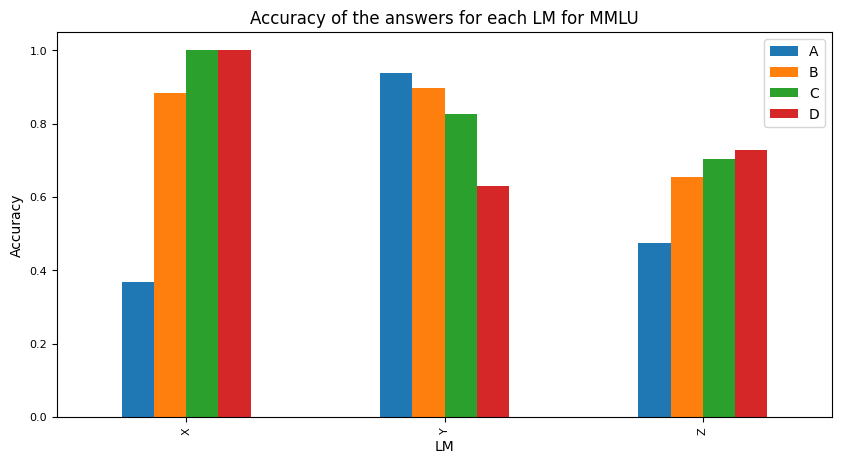

In [56]:
df_mmlu_mean_accuracies_result = pd.DataFrame(index = ['X','Y','Z'])

df_mmlu_mean_accuracies_result["A"] = np.array([df_x_mmlu_answers_accuracy_result.iloc[0,0],
                                                df_y_mmlu_answers_accuracy_result.iloc[0,0],
                                                df_z_mmlu_answers_accuracy_result.iloc[0,0],
                                                ])

df_mmlu_mean_accuracies_result["B"] = np.array([df_x_mmlu_answers_accuracy_result.iloc[1,0],
                                                df_y_mmlu_answers_accuracy_result.iloc[1,0],
                                                df_z_mmlu_answers_accuracy_result.iloc[1,0],
                                                ])

df_mmlu_mean_accuracies_result["C"] = np.array([df_x_mmlu_answers_accuracy_result.iloc[2,0],
                                                df_y_mmlu_answers_accuracy_result.iloc[2,0],
                                                df_z_mmlu_answers_accuracy_result.iloc[2,0],
                                                ])

df_mmlu_mean_accuracies_result["D"] = np.array([df_x_mmlu_answers_accuracy_result.iloc[3,0],
                                                df_y_mmlu_answers_accuracy_result.iloc[3,0],
                                                df_z_mmlu_answers_accuracy_result.iloc[3,0],
                                                ])

df_mmlu_mean_accuracies_result.plot.bar(xlabel="LM", ylabel="Accuracy", title="Accuracy of the answers for each LM for MMLU",
                                      figsize=(10, 5), fontsize=8,)

B. /Discuss:/

LM X and Y tend to have a favorite answer. For X, it is anwser A and for Y, it is D. On the other hand, Z looks more balanced. That's why Ms.Sakota idea was clever. Like that we can see if there a bias. Interestingly, for X and Y, the accuracy of the answers is the inverse bar plot of the distributions of their answers. The more they give an answer, the less acurate it is. It is not the case for Z. The evolution of the accuracy and the distribution is similar. It suggests that Z is much more balanced. Z appears to be the best LM as it is more balanced and does not give the impression to output random answers.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [ ]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [ ]:
# A

In [ ]:
# B

In [ ]:
# C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [ ]:
# A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [ ]:
# A

B. /Dicsuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 